In [100]:
#Data manipulation and preprocessing 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
#Data exploration
from sklearn.feature_selection import chi2
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
#Data balancing
from imblearn.over_sampling import SMOTE
#Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from catboost import CatBoostClassifier

#Model Evaluation
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,accuracy_score,roc_curve
import warnings
warnings.filterwarnings("ignore")

### Data preprocessing

In [101]:
data = pd.read_csv("pone.0194085.s001.csv")#importing the dataset
data.head()

,ID,PATID,UCX_abnormal,ua_bacteria,ua_bili,ua_blood,ua_clarity,ua_color,ua_epi,ua_glucose,...,SKIN_PREPS,SMOKING_DETERRENTS,THYROID_PREPS,UNCLASSIFIED_DRUG_PRODUCTS,VITAMINS,dispo,UTI_diag,split,abxUTI,alt_diag
0,1,1,yes,few,negative,negative,clear,yellow,small,negative,...,No,No,No,No,No,Admit,Yes,training,yes,0
1,2,1,no,many,negative,small,clear,yellow,not_reported,negative,...,No,No,No,No,Yes,Admit,Yes,training,yes,0
2,3,2,yes,few,negative,negative,clear,yellow,small,negative,...,No,No,Yes,Yes,No,Discharge,No,training,no,0
3,4,3,yes,many,negative,negative,not_clear,yellow,not_reported,negative,...,No,No,No,No,Yes,Admit,Yes,training,yes,0
4,5,4,no,moderate,small,negative,clear,orange,not_reported,negative,...,No,No,No,No,No,AMA,No,training,no,0


In [117]:
data.tail()

,ID,PATID,UCX_abnormal,ua_bacteria,ua_bili,ua_blood,ua_clarity,ua_color,ua_epi,ua_glucose,...,SKIN_PREPS,SMOKING_DETERRENTS,THYROID_PREPS,UNCLASSIFIED_DRUG_PRODUCTS,VITAMINS,dispo,UTI_diag,split,abxUTI,alt_diag
80382,80383,55363,no,moderate,negative,large,not_reported,yellow,small,negative,...,Yes,Yes,No,Yes,No,Eloped,No,validation,yes,0
80383,80384,55363,yes,none,negative,small,not_clear,yellow,small,negative,...,No,No,No,No,No,Discharge,Yes,validation,yes,0
80384,80385,55364,no,few,negative,moderate,clear,yellow,not_reported,negative,...,No,No,No,No,No,Discharge,No,validation,no,0
80385,80386,55364,yes,few,negative,negative,not_reported,yellow,small,negative,...,No,No,No,Yes,Yes,Admit,No,validation,yes,0
80386,80387,55365,yes,marked,large,large,not_reported,other,small,negative,...,No,No,Yes,Yes,Yes,Admit,No,validation,yes,0


In [127]:
columns = ['age','gender','race','ua_blood','ua_clarity','ua_color','ua_glucose','ua_ketones',
 'ua_leuk','ua_nitrite','ua_ph','ua_protein','ua_rbc','ua_spec_grav','ua_urobili',
 'ua_wbc','abxUTI']
sample =  data[columns]
len(sample)

80387

In [242]:
df_cleaned = sample[~sample.eq('not_reported').any(axis=1)]
df_cleaned = df_cleaned[~df_cleaned.eq('other').any(axis=1)]
df_cleaned = df_cleaned[~df_cleaned.eq('4+').any(axis=1)]
len(df_cleaned)

41090

In [251]:
####
###
##
df_encoded = pd.get_dummies(df_cleaned, columns=['gender','race','ua_blood','ua_clarity','ua_color','ua_glucose','ua_ketones',
 'ua_leuk','ua_nitrite','ua_ph','ua_protein','ua_rbc','ua_urobili','ua_wbc'])
df_encoded['abxUTI'] = df_cleaned['abxUTI'].replace({'yes':1,'no':0})

In [252]:
df_encoded.head()

,age,ua_spec_grav,abxUTI,gender_Female,gender_Male,race_American Indian or Alaska Native,race_Asian,race_Black or African American,race_Hispanic/Latino,race_Native Hawaiian or Other Pacific Islander,...,ua_rbc_large,ua_rbc_moderate,ua_rbc_negative,ua_rbc_small,ua_urobili_negative,ua_urobili_positive,ua_wbc_large,ua_wbc_moderate,ua_wbc_negative,ua_wbc_small
0,83,1.020,1,True,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False
1,81,1.017,1,True,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
3,84,1.016,1,True,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False
4,55,1.030,0,False,True,False,False,True,False,False,...,False,False,False,True,True,False,False,False,False,True
5,47,1.030,0,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True


test_cols = ['ua_rbc','ua_blood','ua_protein','ua_rbc','ua_wbc','ua_leuk','ua_ketones','ua_blood','ua_glucose']
neg_pov = ['ua_urobili','ua_glucose','ua_nitrite']
for col in test_cols:
    df_cleaned[col].replace({'small':1,
                            'moderate':2,
                            'large':3,
                            'negative':0},inplace = True)
for col in neg_pov:
    df_cleaned[col].replace({'negative':0, 'positive':1},inplace =True)
df_cleaned['ua_clarity'].replace({'not_clear':0,'clear':1},inplace = True)
df_cleaned['gender'].replace({'Male':0,'Female':1},inplace = True)
df_cleaned['race'].replace({'White or Caucasian':1, 'Black or African American':2,
       'Hispanic/Latino':3, 'Patient Refused':0, 'Asian':4,
       'Unknown':7, 'American Indian or Alaska Native':5,
       'Native Hawaiian or Other Pacific Islander':6,'Other':8},inplace = True)
df_cleaned['ua_color'].replace({'yellow':1,'orange':2, 'amber':3, 'red':4, 'colorless':5},inplace = True)
df_cleaned['abxUTI'].replace({'yes':1,'no':0},inplace = True)
df_cleaned.head()

In [192]:
for col in df_cleaned.columns:
    print(df_cleaned[col].value_counts())

age
25     721
22     711
23     704
21     691
26     682
      ... 
102     17
103     15
104      9
105      4
106      2
Name: count, Length: 89, dtype: int64
gender
1    28890
0    12200
Name: count, dtype: int64
race
1    23657
2     8594
8     7105
0      547
4      508
3      364
7      242
5       39
6       34
Name: count, dtype: int64
ua_blood
0    17280
1     9580
3     9153
2     5077
Name: count, dtype: int64
ua_clarity
0    21614
1    19476
Name: count, dtype: int64
ua_color
1    36148
4     1851
5     1660
3     1066
2      365
Name: count, dtype: int64
ua_glucose
0           37201
small        2616
large         928
moderate      345
Name: count, dtype: int64
ua_ketones
0    34237
1     4855
2     1198
3      800
Name: count, dtype: int64
ua_leuk
1    17725
0    17208
3     3865
2     2292
Name: count, dtype: int64
ua_nitrite
0    35945
1     5145
Name: count, dtype: int64
ua_ph
6.0    17179
6.5     8170
5.5     6035
7.0     5087
7.5     2537
8.0      925
5.0      788


In [253]:
#Feature selection and data splitting
x = df_encoded.drop('abxUTI',axis =1)
y = df_cleaned['abxUTI']
len(y)

41090

In [254]:
x.head()

,age,ua_spec_grav,gender_Female,gender_Male,race_American Indian or Alaska Native,race_Asian,race_Black or African American,race_Hispanic/Latino,race_Native Hawaiian or Other Pacific Islander,race_Other,...,ua_rbc_large,ua_rbc_moderate,ua_rbc_negative,ua_rbc_small,ua_urobili_negative,ua_urobili_positive,ua_wbc_large,ua_wbc_moderate,ua_wbc_negative,ua_wbc_small
0,83,1.020,True,False,False,False,False,False,False,True,...,False,False,False,True,True,False,False,True,False,False
1,81,1.017,True,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
3,84,1.016,True,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,False,False
4,55,1.030,False,True,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,True
5,47,1.030,True,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True


In [255]:
#Splitting the data to the training and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 40)
print(len(x_train))
print(len(x_test))

28763
12327


In [256]:
k_nn = TrainImbModels(KNeighborsClassifier(),x_train, y_train, x_test, y_test)#KNN
k_nn.imb_model()

              precision    recall  f1-score   support

          no       0.57      0.52      0.55      4723
         yes       0.72      0.75      0.74      7604

    accuracy                           0.67     12327
   macro avg       0.64      0.64      0.64     12327
weighted avg       0.66      0.67      0.66     12327



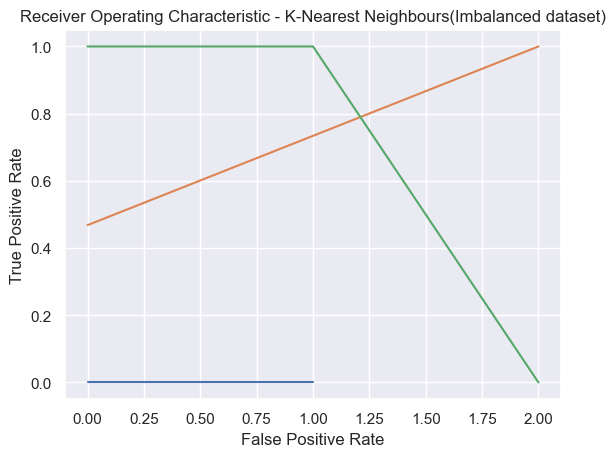

In [155]:
k_nn.plot_roc("K-Nearest Neighbours(Imbalanced dataset)")

In [257]:
rand_for = TrainImbModels(RandomForestClassifier(),x_train, y_train, x_test, y_test)#Random Forest
rand_for.imb_model()

              precision    recall  f1-score   support

          no       0.61      0.55      0.58      4723
         yes       0.73      0.78      0.76      7604

    accuracy                           0.69     12327
   macro avg       0.67      0.66      0.67     12327
weighted avg       0.69      0.69      0.69     12327



In [258]:
rand_for.plot_roc("Random Forest(Imbalanced dataset)")

ValueError: y_true takes value in {'no', 'yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [259]:
DT = TrainImbModels(DecisionTreeClassifier(),x_train, y_train, x_test, y_test) #Decision tree
DT.imb_model()

              precision    recall  f1-score   support

          no       0.53      0.52      0.52      4723
         yes       0.70      0.71      0.71      7604

    accuracy                           0.64     12327
   macro avg       0.62      0.62      0.62     12327
weighted avg       0.64      0.64      0.64     12327



In [260]:
naive_bayes = TrainImbModels(GaussianNB(),x_train, y_train, x_test, y_test) #Naive Bayes
naive_bayes.imb_model()

              precision    recall  f1-score   support

          no       0.51      0.82      0.63      4723
         yes       0.82      0.52      0.64      7604

    accuracy                           0.63     12327
   macro avg       0.67      0.67      0.63     12327
weighted avg       0.70      0.63      0.63     12327



In [261]:
svm = TrainImbModels(SVC(),x_train, y_train, x_test, y_test) #Support Vector Machine
svm.imb_model()

              precision    recall  f1-score   support

          no       0.64      0.44      0.52      4723
         yes       0.71      0.85      0.77      7604

    accuracy                           0.69     12327
   macro avg       0.68      0.64      0.65     12327
weighted avg       0.68      0.69      0.68     12327



In [203]:
df_cleaned.columns

Index(['age', 'gender', 'race', 'ua_blood', 'ua_clarity', 'ua_color',
       'ua_glucose', 'ua_ketones', 'ua_leuk', 'ua_nitrite', 'ua_ph',
       'ua_protein', 'ua_rbc', 'ua_spec_grav', 'ua_urobili', 'ua_wbc',
       'abxUTI'],
      dtype='object')

In [204]:
cat_features = ['gender', 'race', 'ua_blood', 'ua_clarity', 'ua_color',
       'ua_glucose', 'ua_ketones', 'ua_leuk', 'ua_nitrite', 'ua_ph',
       'ua_protein', 'ua_rbc', 'ua_urobili', 'ua_wbc'] #selecting the categorical variables in the dataset
cat = CatBoostClassifier(iterations=1000, 
                           depth=6, 
                           learning_rate=0.1, 
                           loss_function='Logloss', 
                           verbose=True)
# Training the model
cat.fit(x_train, y_train, cat_features=cat_features, eval_set=(x_test, y_test), plot=True)

# Making predictions
cat_pred = cat.predict(x_test)
print(classification_report(y_test,cat_pred))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6633965	test: 0.6633448	best: 0.6633448 (0)	total: 132ms	remaining: 2m 12s
1:	learn: 0.6423194	test: 0.6423080	best: 0.6423080 (1)	total: 259ms	remaining: 2m 9s
2:	learn: 0.6257016	test: 0.6256807	best: 0.6256807 (2)	total: 390ms	remaining: 2m 9s
3:	learn: 0.6116828	test: 0.6117588	best: 0.6117588 (3)	total: 534ms	remaining: 2m 12s
4:	learn: 0.6011028	test: 0.6011636	best: 0.6011636 (4)	total: 619ms	remaining: 2m 3s
5:	learn: 0.5918606	test: 0.5919896	best: 0.5919896 (5)	total: 737ms	remaining: 2m 2s
6:	learn: 0.5851213	test: 0.5852446	best: 0.5852446 (6)	total: 828ms	remaining: 1m 57s
7:	learn: 0.5789178	test: 0.5791257	best: 0.5791257 (7)	total: 966ms	remaining: 1m 59s
8:	learn: 0.5742217	test: 0.5745715	best: 0.5745715 (8)	total: 1.11s	remaining: 2m 2s
9:	learn: 0.5702651	test: 0.5709098	best: 0.5709098 (9)	total: 1.22s	remaining: 2m
10:	learn: 0.5672108	test: 0.5679458	best: 0.5679458 (10)	total: 1.31s	remaining: 1m 58s
11:	learn: 0.5648805	test: 0.5657087	best: 0.56570

In [182]:
for col in subset.columns:
    print(subset[col].value_counts().index.unique())
    print(df_cleaned[col].value_counts().index.unique())

Index([ 55,  25,  23,  22,  26,  24,  21,  27,  29,  20,  52,  31,  53,  30,
        50,  33,  28,  35,  19,  51,  57,  49,  48,  58,  60,  32,  54,  56,
        36,  67,  34,  59,  47,  44,  66,  37,  84,  63,  46,  85,  45,  65,
        86,  68,  62,  61,  64,  38,  73,  88,  81,  87,  72,  76,  40,  82,
        69,  74,  42,  83,  41,  79,  77,  90,  18,  39,  43,  89,  78,  71,
        75,  80,  70,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       103, 102, 104, 105, 106, 109, 107],
      dtype='int64', name='age')
Index([ 25,  22,  23,  21,  26,  29,  24,  27,  20,  52,  31,  30,  33,  19,
        58,  57,  50,  60,  53,  67,  51,  88,  28,  54,  66,  59,  55,  32,
        86,  49,  35,  84,  85,  48,  34,  36,  73,  56,  64,  63,  76,  44,
        68,  47,  37,  74,  81,  82,  72,  89,  83,  87,  62,  65,  71,  78,
        69,  45,  77,  79,  18,  61,  46,  90,  75,  38,  91,  42,  40,  70,
        80,  41,  43,  39,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,


0    1
1    1
3    0
4    1
5    0
Name: ua_clarity, dtype: int64

In [102]:
#Columns containing demographics and urinalysis results
columns = ['age','gender','race','ua_blood','ua_clarity','ua_color','ua_glucose','ua_ketones',
 'ua_leuk','ua_nitrite','ua_ph','ua_protein','ua_rbc','ua_spec_grav','ua_urobili',
 'ua_wbc','abxUTI']

In [103]:
#creating a subset of the original dataset
subset = data[columns]
len(subset)

80387

In [106]:
#categorical data columns
cat_data = subset[['gender','race','ua_blood','ua_clarity','ua_color','ua_glucose','ua_ketones',
 'ua_leuk','ua_nitrite','ua_ph','ua_protein','ua_rbc','ua_urobili','ua_wbc','abxUTI']]

#making all the values in the categorical data strings for easy label encoding
for col in cat_data.columns:
    cat_data[col] = cat_data[col].astype('str')

In [31]:
#convert categorical data to numerical data
#[['gender','race']]
LB = LabelEncoder()
cat_data = cat_data.apply(LB.fit_transform)

In [45]:
#concating the numerical data with the label encoded data
prep_data = pd.concat([subset[['age','ua_spec_grav']],cat_data],axis = 1)
prep_data.tail()

,age,ua_spec_grav,gender,race,ua_blood,ua_clarity,ua_color,ua_glucose,ua_ketones,ua_leuk,ua_nitrite,ua_ph,ua_protein,ua_rbc,ua_urobili,ua_wbc,abxUTI
80382,53,1.023,0,5,0,2,6,2,3,5,0,3,2,1,0,1,1
80383,22,1.034,0,5,5,1,6,2,3,5,0,1,5,5,0,0,1
80384,49,1.028,1,3,1,0,6,2,3,2,0,2,2,1,0,5,0
80385,72,1.015,0,8,2,2,6,2,6,5,0,3,5,5,0,1,1
80386,73,1.029,1,8,0,2,4,2,6,0,3,1,5,1,0,1,1


In [34]:
#comparing the original values and label encoded values
for col in subset.columns:
    print(subset[col].value_counts().index.unique())
    print(prep_data[col].value_counts().index.unique())

Index([ 55,  25,  23,  22,  26,  24,  21,  27,  29,  20,  52,  31,  53,  30,
        50,  33,  28,  35,  19,  51,  57,  49,  48,  58,  60,  32,  54,  56,
        36,  67,  34,  59,  47,  44,  66,  37,  84,  63,  46,  85,  45,  65,
        86,  68,  62,  61,  64,  38,  73,  88,  81,  87,  72,  76,  40,  82,
        69,  74,  42,  83,  41,  79,  77,  90,  18,  39,  43,  89,  78,  71,
        75,  80,  70,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       103, 102, 104, 105, 106, 109, 107],
      dtype='int64', name='age')
Index([ 55,  25,  23,  22,  26,  24,  21,  27,  29,  20,  52,  31,  53,  30,
        50,  33,  28,  35,  19,  51,  57,  49,  48,  58,  60,  32,  54,  56,
        36,  67,  34,  59,  47,  44,  66,  37,  84,  63,  46,  85,  45,  65,
        86,  68,  62,  61,  64,  38,  73,  88,  81,  87,  72,  76,  40,  82,
        69,  74,  42,  83,  41,  79,  77,  90,  18,  39,  43,  89,  78,  71,
        75,  80,  70,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,


In [35]:
len(subset.columns)#Number of columns in the subset

17

In [36]:
subset['abxUTI'].value_counts() #values in the diagnosis

abxUTI
yes    45151
no     35236
Name: count, dtype: int64

Text(0.5, 1.0, 'Negative versus positive diagnosis')

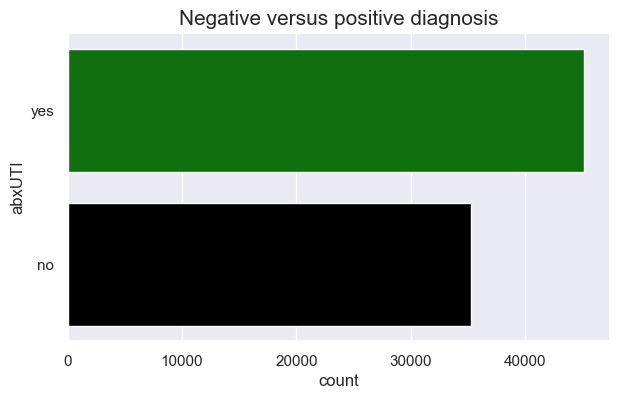

In [37]:
#Negative and positive diagnosis
plt.figure(figsize = (7,4))
sns.countplot(subset['abxUTI'], palette=['green', 'black'])
plt.title('Negative versus positive diagnosis',fontdict = {'size':15})

In [43]:
#Missing data analysis
prep_data.isnull().sum()

age             0
ua_spec_grav    0
gender          0
race            0
ua_blood        0
ua_clarity      0
ua_color        0
ua_glucose      0
ua_ketones      0
ua_leuk         0
ua_nitrite      0
ua_ph           0
ua_protein      0
ua_rbc          0
ua_urobili      0
ua_wbc          0
abxUTI          0
dtype: int64

In [229]:
#Feature selection and data splitting
x = prep_data.drop(['abxUTI','ua_urobili','ua_ketones'],axis = 1)
y = prep_data['abxUTI']
len(y)

41100

In [230]:
x

,age,ua_spec_grav,gender,race,ua_blood,ua_clarity,ua_color,ua_glucose,ua_leuk,ua_nitrite,ua_ph,ua_protein,ua_rbc,ua_wbc
0,83,1.020,0,5,2,0,4,2,3,0,5,2,3,1
1,81,1.017,0,8,3,0,4,2,2,0,2,1,3,3
3,84,1.016,0,8,2,1,4,2,0,0,1,3,3,1
4,55,1.030,1,2,2,0,2,2,3,1,2,1,3,3
5,47,1.030,0,8,0,1,4,2,3,0,2,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80374,31,1.023,0,2,2,0,4,2,3,0,2,3,3,3
80375,44,1.013,0,5,2,0,4,2,0,0,3,3,3,1
80378,64,1.019,1,6,3,1,4,2,3,0,2,2,3,0
80383,22,1.034,0,5,3,1,4,2,3,0,1,3,3,0


In [231]:
#Splitting the data to the training and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 40)
print(len(x_train))
print(len(x_test))

28770
12330


### Training the data

In [232]:
class TrainImbModels: #Class for training ad evaluation of a model
    def __init__(self,model,x_train, y_train, x_test, y_test):
        self.model = model
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.predictions = None
    def imb_model(self):#function for training imbalanced models
        self.model.fit(self.x_train,self.y_train)
        self.predictions = self.model.predict(x_test)
        return print(classification_report(self.y_test,self.predictions))
    def plot_roc(self,model_name):
        plt.plot(roc_curve(self.y_test,self.predictions))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {model_name}')
    

In [233]:
k_nn = TrainImbModels(KNeighborsClassifier(),x_train, y_train, x_test, y_test)#KNN
k_nn.imb_model()

              precision    recall  f1-score   support

           0       0.55      0.53      0.54      4703
           1       0.72      0.73      0.72      7627

    accuracy                           0.66     12330
   macro avg       0.63      0.63      0.63     12330
weighted avg       0.65      0.66      0.65     12330



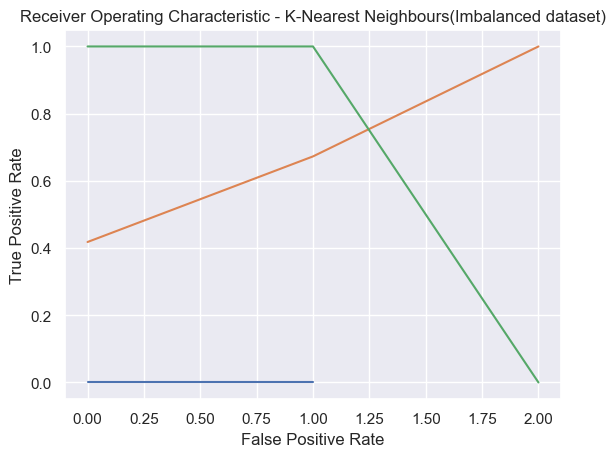

In [78]:
k_nn.plot_roc("K-Nearest Neighbours(Imbalanced dataset)")

In [234]:
rand_for = TrainImbModels(RandomForestClassifier(),x_train, y_train, x_test, y_test)#Random Forest
rand_for.imb_model()

              precision    recall  f1-score   support

           0       0.60      0.55      0.58      4703
           1       0.74      0.78      0.76      7627

    accuracy                           0.69     12330
   macro avg       0.67      0.67      0.67     12330
weighted avg       0.69      0.69      0.69     12330



In [206]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier()
scores = cross_val_score(model, x, y, cv=5)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')

Cross-validation scores: [0.66816744 0.69944025 0.69554636 0.69481626 0.68934047]
Mean cross-validation score: 0.6894621562423947


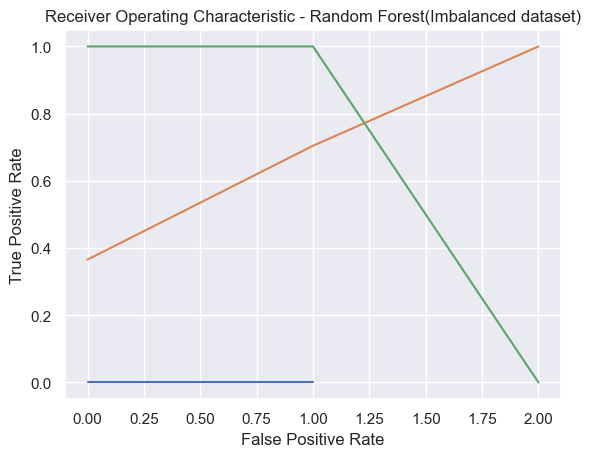

In [80]:
rand_for.plot_roc("Random Forest(Imbalanced dataset)")

In [213]:
log_reg = TrainImbModels(LogisticRegression(),x_train, y_train, x_test, y_test)#Logistic Regression
log_reg.imb_model()

              precision    recall  f1-score   support

           0       0.59      0.55      0.57      4703
           1       0.73      0.77      0.75      7627

    accuracy                           0.68     12330
   macro avg       0.66      0.66      0.66     12330
weighted avg       0.68      0.68      0.68     12330



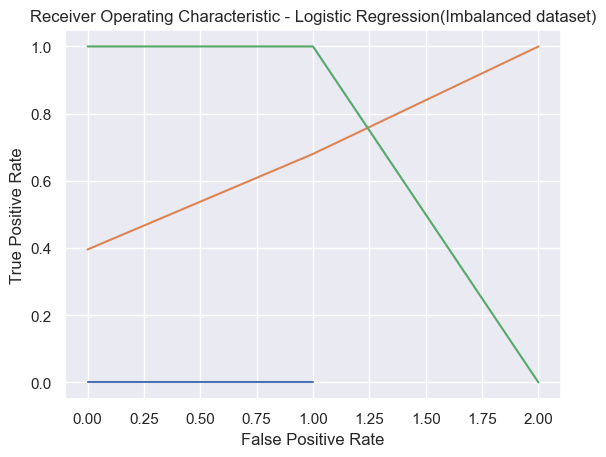

In [82]:
log_reg.plot_roc("Logistic Regression(Imbalanced dataset)")

In [214]:
ada = TrainImbModels(AdaBoostClassifier(),x_train, y_train, x_test, y_test)#Adaptive Boosting
ada.imb_model()

              precision    recall  f1-score   support

           0       0.61      0.55      0.58      4703
           1       0.74      0.79      0.76      7627

    accuracy                           0.70     12330
   macro avg       0.68      0.67      0.67     12330
weighted avg       0.69      0.70      0.69     12330



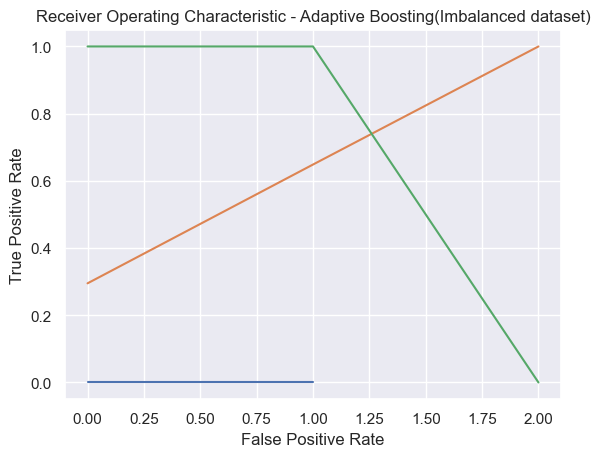

In [84]:
ada.plot_roc("Adaptive Boosting(Imbalanced dataset)")

In [215]:
DT = TrainImbModels(DecisionTreeClassifier(),x_train, y_train, x_test, y_test) #Decision tree
DT.imb_model()

              precision    recall  f1-score   support

           0       0.53      0.51      0.52      4703
           1       0.70      0.72      0.71      7627

    accuracy                           0.64     12330
   macro avg       0.62      0.61      0.62     12330
weighted avg       0.64      0.64      0.64     12330



In [216]:
naive_bayes = TrainImbModels(GaussianNB(),x_train, y_train, x_test, y_test) #Naive Bayes
naive_bayes.imb_model()

              precision    recall  f1-score   support

           0       0.50      0.86      0.63      4703
           1       0.85      0.47      0.61      7627

    accuracy                           0.62     12330
   macro avg       0.67      0.67      0.62     12330
weighted avg       0.72      0.62      0.62     12330



In [217]:
svm = TrainImbModels(SVC(),x_train, y_train, x_test, y_test) #Support Vector Machine
svm.imb_model()

              precision    recall  f1-score   support

           0       0.60      0.51      0.55      4703
           1       0.72      0.79      0.76      7627

    accuracy                           0.68     12330
   macro avg       0.66      0.65      0.65     12330
weighted avg       0.68      0.68      0.68     12330



In [221]:
cat_features = [ 'gender', 'race', 'ua_blood', 'ua_clarity',
       'ua_color', 'ua_glucose', 'ua_ketones', 'ua_leuk', 'ua_nitrite',
       'ua_ph', 'ua_protein', 'ua_rbc','ua_wbc'] #selecting the categorical variables in the dataset
cat = CatBoostClassifier(iterations=1000, 
                           depth=6, 
                           learning_rate=0.1, 
                           loss_function='Logloss', 
                           verbose=True)
# Training the model
cat.fit(x_train, y_train, cat_features=cat_features, eval_set=(x_test, y_test), plot=True)

# Making predictions
cat_pred = cat.predict(x_test)
print(classification_report(y_test,cat_pred))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6637257	test: 0.6646721	best: 0.6646721 (0)	total: 103ms	remaining: 1m 42s
1:	learn: 0.6404001	test: 0.6422779	best: 0.6422779 (1)	total: 217ms	remaining: 1m 48s
2:	learn: 0.6228659	test: 0.6253324	best: 0.6253324 (2)	total: 336ms	remaining: 1m 51s
3:	learn: 0.6091436	test: 0.6121859	best: 0.6121859 (3)	total: 442ms	remaining: 1m 50s
4:	learn: 0.5995369	test: 0.6027721	best: 0.6027721 (4)	total: 550ms	remaining: 1m 49s
5:	learn: 0.5908953	test: 0.5945372	best: 0.5945372 (5)	total: 652ms	remaining: 1m 48s
6:	learn: 0.5839596	test: 0.5877015	best: 0.5877015 (6)	total: 777ms	remaining: 1m 50s
7:	learn: 0.5785663	test: 0.5825742	best: 0.5825742 (7)	total: 887ms	remaining: 1m 50s
8:	learn: 0.5740992	test: 0.5783237	best: 0.5783237 (8)	total: 1.05s	remaining: 1m 55s
9:	learn: 0.5707044	test: 0.5749083	best: 0.5749083 (9)	total: 1.45s	remaining: 2m 23s
10:	learn: 0.5682729	test: 0.5725642	best: 0.5725642 (10)	total: 1.5s	remaining: 2m 15s
11:	learn: 0.5651942	test: 0.5697689	best:

age 11.661466336855614
gender 1.5944635927402826
race 3.7654402567598773
ua_blood 4.661107042374615
ua_clarity 1.596969117167116
ua_color 2.7609894951756204
ua_glucose 1.8067765480986462
ua_ketones 3.3378427224778995
ua_leuk 7.2104046698710285
ua_nitrite 14.091328940629698
ua_ph 2.075448323711355
ua_protein 6.40261074597213
ua_rbc 2.570379925911977
ua_spec_grav 5.451227558899773
ua_urobili 0.47754881410680283
ua_wbc 30.5359959092476


Text(0.5, 1.0, 'Effect of each variable on the Categorical Boosting model')

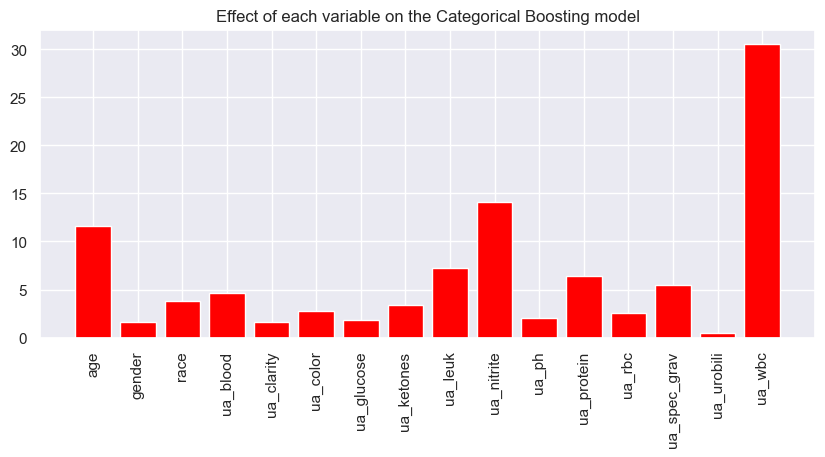

In [207]:
#The effect of the variables on the model
variables =[]
scores = []
for name, score in zip(x_train, cat.feature_importances_):
    print(name, score)
    variables.append(name)
    scores.append(score)
    
cat_effect = pd.DataFrame({"Variables": variables,
                         "Effect" : scores})
plt.figure(figsize = (10,4))
plt.bar(cat_effect["Variables"],
        cat_effect["Effect"], color = 'red')
plt.xticks(rotation=90)
plt.title("Effect of each variable on the Categorical Boosting model")